# b06705048_hw2

## Load package and data
Load packages and data, and then standardize all feature values.
Now, we have data：

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
train = pd.read_csv("df1_train.csv")
test_x = pd.read_csv("df1_test1.csv")
test_y = pd.read_csv("df1_test1y.csv")

## Q1
Conduct exploratory analysis on this dataset.

**(1)summary statistics**

show：count, mean, minimum value, maximum value, standard deviation, median, mode, range

**(2)visualizations of the key variables**

**(3)discuss the characteristics**


In [0]:
%matplotlib inline
# take a look at first five records in training data
train.head(5)

,life_post_consumer,comp_page_like,Paid,life_post_reach,life_post_impression_liked,life_post_reach_liked,comment,like,share,type_link,type_status,type_video,cat2,cat3,month1,month2,month3,month4,month5,month6,month7,month8,month9,month10,month11,dow1,dow2,dow3,dow4,dow5,dow6,hour2,hour3,hour4,hour5,hour6,hour7,hour8,hour9,hour10,hour11,hour12,hour13,hour14
0,523,125612,0,2763,3519,2124,0,62,10,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,408,135700,0,3756,4935,2556,16,117,30,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,37,137020,1,1357,2154,1120,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,808,137893,1,37376,22100,10880,20,411,74,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,359,133594,0,1809,2541,1435,2,64,7,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [0]:
# View the amount of trainning data
print(train.shape)

(400, 44)


which means that there are 400 records and 44 features.

In [0]:
# get summary statistics of continuous-valued in train
continuous = ["life_post_consumer","comp_page_like","life_post_reach","life_post_impression_liked","life_post_reach_liked","comment","like","share"]
train[continuous].describe()

,life_post_consumer,comp_page_like,life_post_reach,life_post_impression_liked,life_post_reach_liked,comment,like,share
count,400.000000,400.000000,400.000000,4.000000e+02,400.000000,400.000000,400.00000,400.000000
mean,810.340000,122890.625000,13436.855000,1.747735e+04,6585.952500,6.855000,169.07250,25.485000
std,899.037251,16280.121461,20454.614675,6.614514e+04,7599.228501,14.402519,243.14837,25.946248
min,17.000000,81370.000000,238.000000,5.670000e+02,236.000000,0.000000,0.00000,0.000000
25%,335.000000,112676.000000,3282.500000,3.962500e+03,2171.000000,1.000000,55.75000,10.000000
50%,554.500000,128816.000000,5150.000000,6.214500e+03,3391.000000,3.000000,98.00000,18.500000
75%,955.500000,136393.000000,13232.000000,1.510450e+04,8011.000000,7.000000,187.25000,32.000000
max,11328.000000,139441.000000,139008.000000,1.107833e+06,48368.000000,146.000000,1998.00000,208.000000


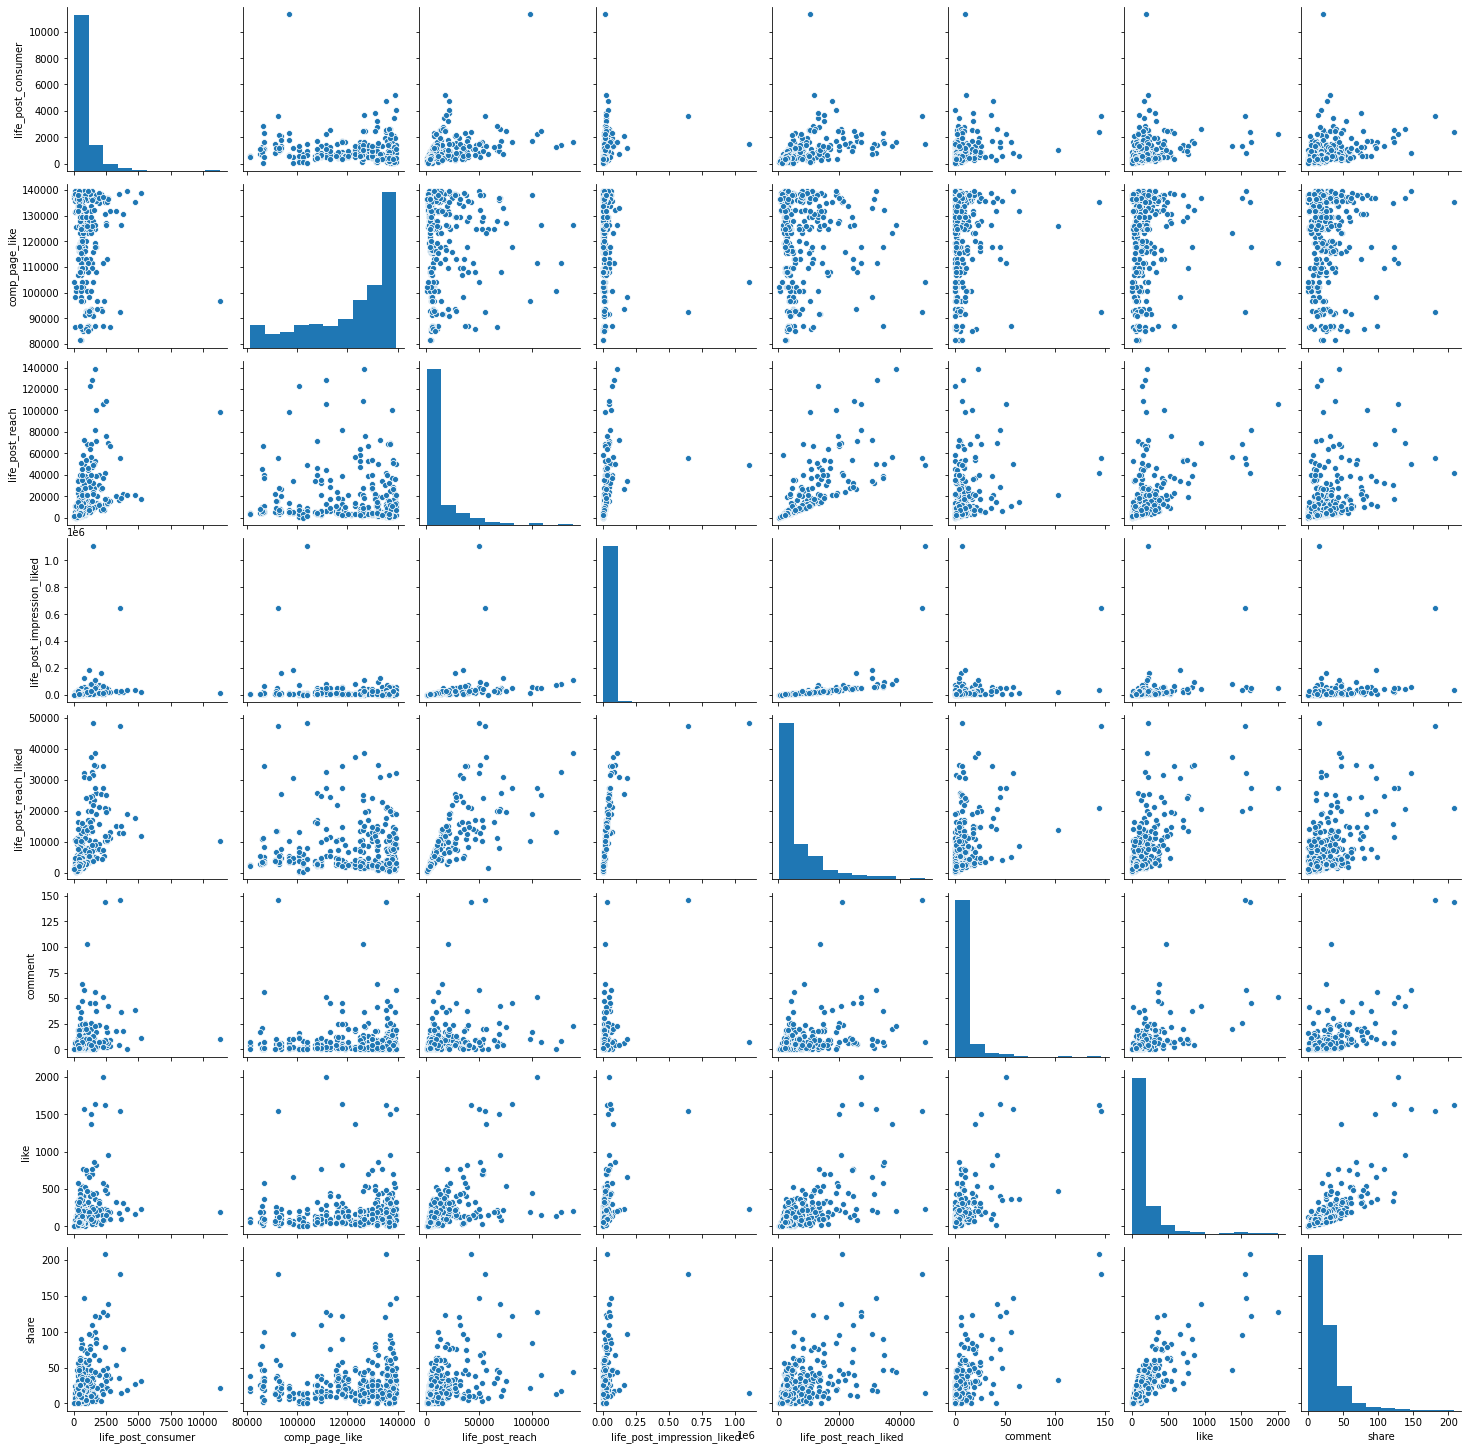

In [0]:
# visualizations of continuous-valued variables in train
sns.pairplot(train, vars = continuous)

In [0]:
train["Paid"].value_counts()

0    296
1    104
Name: Paid, dtype: int64

104 companys paid to Facebook for advertising

type_link              15
type_status            33
type_video              7
type_photo_sharing    345
dtype: int64


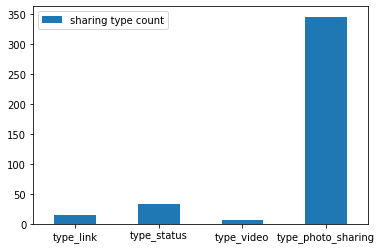

In [0]:
# keep going analysis on binary variables in train 
# (1) sharing type：link sharing/ status updates/ video sharing/ photo sharing 

_type = ["type_link", "type_status", "type_video", "type_photo_sharing"]

def function(a, b, c): 
  if (a == 0) and (b == 0) and (c == 0): 
    return 1 
  else: 
    return 0 
train["type_photo_sharing"] = train.apply(lambda x: function(x.type_link, x.type_status, x.type_video), axis = 1)
type = pd.DataFrame(train[_type].sum(),columns=["sharing type count"])
type.plot(kind = 'bar', rot = 0)
print(train[_type].sum())


product        104
inspiration    118
action         178
dtype: int64


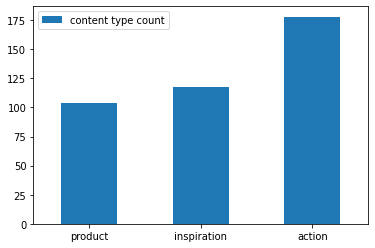

In [0]:
# keep going analysis on binary variables in train 
# (2) content type：product/ inspiration/ action
def function2(a, b): 
  if (a == 0) and (b == 0): 
    return 1 
  else: 
    return 0 

_type2 = ["product", "inspiration", "action"]
train["action"] = train.apply(lambda x: function2(x.cat2, x.cat3), axis = 1)
train.rename(columns={"cat2":"product","cat3":"inspiration"} ,inplace = True)

type2 = pd.DataFrame(train[_type2].sum(),columns=["content type count"])
type2.plot(kind = 'bar', rot = 0)
print(train[_type2].sum())

month1     22
month2     18
month3     32
month4     38
month5     33
month6     43
month7     40
month8     26
month9     25
month10    48
month11    39
month12    36
dtype: int64


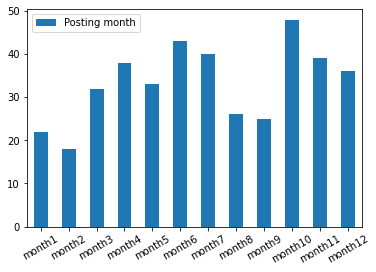

In [0]:
# keep going analysis on binary variables in train 
# (3) month
_month = ["month1","month2","month3","month4","month5","month6","month7","month8","month9","month10","month11","month12"]
train.insert(26,"month12",0)
train["monthsum"] = train[_month].sum(axis = 1)

train.loc[train.monthsum == 0,"month12"] = 1
train.loc[train.monthsum == 1,"month12"] = 0

month = pd.DataFrame(train[_month].sum(),columns = ["Posting month"])
month.plot(kind = 'bar', rot = 30)
print(train[_month].sum())

dow1    59
dow2    56
dow3    52
dow4    49
dow5    53
dow6    67
dtype: int64


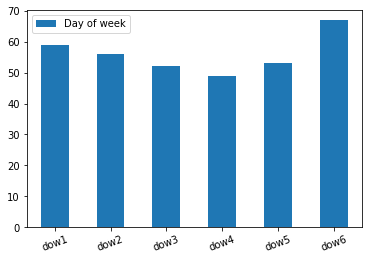

In [0]:
# keep going analysis on binary variables in train 
# (4) day
_day = ["dow1","dow2","dow3","dow4","dow5","dow6"]

day = pd.DataFrame(train[_day].sum(),columns=["Day of week"])
day.plot(kind="bar",rot=20)
print(train[_day].sum())

hour2     32
hour3     84
hour4     28
hour5      9
hour6     12
hour7     13
hour8      9
hour9     25
hour10    60
hour11    37
hour12    22
hour13    41
hour14    10
dtype: int64


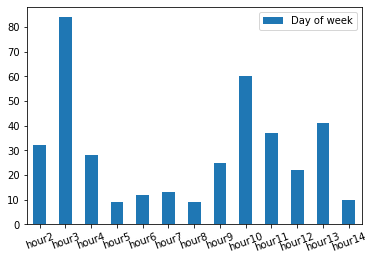

In [0]:
# keep going analysis on binary variables in train 
# (5) hours
_hour = ["hour2","hour3","hour4","hour5","hour6","hour7","hour8","hour9","hour10","hour11","hour12","hour13","hour14"]

hour = pd.DataFrame(train[_hour].sum(),columns=["Day of week"])
hour.plot(kind="bar",rot=20)
print(train[_hour].sum())

**discuss the characteristics**

1. photo sharing is the most common way.
2. action is the most common form of content.
3. the day of week may has no effect, since the  quantity looks close
4. hour3 is the most common time.
5. From scatter plot, we can see there are some linear correlations between some independent variables,such as share and like,life_post_reach and life_post_reach_liked.

##Q2 (case 1)

Construct a prediction model using the setting of Case 1. 

**Method：ymean**

**x_continue：not used**

**x_binary：not used**

**y：keep**


show 
1. test RMSE
2. for the first 20 data points in the testing data：

    the predictions 

    the true outcome values 

In [0]:
#  simply uses the mean of  y  in the training data to do prediction
train = pd.read_csv("df1_train.csv")
test_x = pd.read_csv("df1_test1.csv")
test_y = pd.read_csv("df1_test1y.csv")

mean = train["life_post_consumer"].mean()
ypred = pd.DataFrame([mean] * test_x.shape[0], columns = ["prediction"])
print("RMSE = ", sqrt(mean_squared_error(test_y,ypred)))

RMSE =  928.8095109332162


In [0]:
test_y = pd.concat([test_y, ypred], axis=1)
print("the first 20 data points]\n", test_y[:20])

the first 20 data points]
     life_post_consumer  prediction
0                 1183      810.34
1                  189      810.34
2                 2327      810.34
3                   76      810.34
4                  354      810.34
5                  713      810.34
6                  204      810.34
7                  288      810.34
8                  555      810.34
9                  586      810.34
10                 446      810.34
11                 884      810.34
12                 524      810.34
13                 672      810.34
14                  23      810.34
15                 570      810.34
16                1361      810.34
17                5934      810.34
18                2319      810.34
19                1633      810.34


## Q3(case 2A)
Construct a prediction model using the setting of Case 2A. 

**Method：OLS**

**x_continue：keep**

**x_binary：keep**

**y：keep**


show 
1. test RMSE
2. for the first 20 data points in the testing data：

    the predictions 

    the true outcome values 

In [0]:
# ordinary least squares
train = pd.read_csv("df1_train.csv")
test_x = pd.read_csv("df1_test1.csv")
test_y = pd.read_csv("df1_test1y.csv")

train_y = train["life_post_consumer"]
train_x = train.drop("life_post_consumer", axis = 1)

model = LinearRegression()
model.fit(train_x, train_y)
ypred = pd.DataFrame(model.predict(test_x), columns = ["prediction"])
print("RMSE = ", sqrt(mean_squared_error(test_y,ypred)))

RMSE =  692.2891271383273


In [0]:
test_y = pd.concat([test_y, ypred], axis=1)
print("the first 20 data points\n", test_y[:20])

the first 20 data points
     life_post_consumer   prediction
0                 1183   781.579915
1                  189   315.920431
2                 2327  2279.084852
3                   76  -136.342864
4                  354   302.356241
5                  713   462.424024
6                  204   321.677708
7                  288   504.522448
8                  555   505.895471
9                  586   488.367006
10                 446   392.614235
11                 884   388.918467
12                 524   804.875275
13                 672   634.323644
14                  23   176.317656
15                 570   645.729138
16                1361  1983.538589
17                5934  3144.397100
18                2319  4060.610712
19                1633  4288.223081


## Q4(case 2B)

Construct a prediction model using the setting of Case 2B. 

**Method：OLS**

**x_continue：keep**

**x_binary：keep**

**y：de-mean**


show 
1. test RMSE
2. for the first 20 data points in the testing data：

    the predictions 

    the true outcome values 

In [0]:
train = pd.read_csv("df1_train.csv")
test_x = pd.read_csv("df1_test1.csv")
test_y = pd.read_csv("df1_test1y.csv")

train_x = train.drop("life_post_consumer",axis=1)

# subtract  train_y_mean  from all outcome values 
# in the training and testing data.
mean = train["life_post_consumer"].mean()
train_y = train["life_post_consumer"]-mean

model = LinearRegression()
model.fit(train_x, train_y)
ypred = pd.DataFrame( model.predict(test_x) , columns = ["prediction"])
ypred += mean 
print("RMSE = ", sqrt(mean_squared_error(test_y,ypred)))

RMSE =  692.2891271382294


In [0]:
test_y = pd.concat([test_y, ypred], axis=1)
print("the first 20 data points\n", test_y[:20])

the first 20 data points
     life_post_consumer   prediction
0                 1183   781.579915
1                  189   315.920431
2                 2327  2279.084852
3                   76  -136.342864
4                  354   302.356241
5                  713   462.424024
6                  204   321.677708
7                  288   504.522448
8                  555   505.895471
9                  586   488.367006
10                 446   392.614235
11                 884   388.918467
12                 524   804.875275
13                 672   634.323644
14                  23   176.317656
15                 570   645.729138
16                1361  1983.538589
17                5934  3144.397100
18                2319  4060.610712
19                1633  4288.223081


## Q5(case 2C)

Construct a prediction model using the setting of Case 2C. 

**Method：OLS**

**x_continue：std**

**x_binary：std**

**y：de-mean**


show 
1. test RMSE
2. for the first 20 data points in the testing data：

    the predictions 

    the true outcome values 

In [0]:
train = pd.read_csv("df1_train.csv")
test_x = pd.read_csv("df1_test1.csv")
test_y = pd.read_csv("df1_test1y.csv")

# y: de-mean
mean = train["life_post_consumer"].mean()
train_y = train["life_post_consumer"] - mean
train_x = train.drop("life_post_consumer",axis=1)

# x : std
# apply the same procedure for test data 
# using the mean and standard deviation computed from training data.

std_train_x = (train_x - train_x.mean())/train_x.std()
std_test_x = (test_x - train_x.mean())/train_x.std()

model = LinearRegression()
model.fit(std_train_x, train_y)
ypred = pd.DataFrame(model.predict(std_test_x), columns = ["prediction"])
ypred += mean
print("RMSE = ", sqrt(mean_squared_error(test_y,ypred)))

RMSE =  692.2891271372007


In [0]:
test_y = pd.concat([test_y, ypred], axis=1)
print("the first 20 data points]\n", test_y[:20])

the first 20 data points]
     life_post_consumer   prediction
0                 1183   781.579915
1                  189   315.920431
2                 2327  2279.084852
3                   76  -136.342864
4                  354   302.356241
5                  713   462.424024
6                  204   321.677708
7                  288   504.522448
8                  555   505.895471
9                  586   488.367006
10                 446   392.614235
11                 884   388.918467
12                 524   804.875275
13                 672   634.323644
14                  23   176.317656
15                 570   645.729138
16                1361  1983.538589
17                5934  3144.397100
18                2319  4060.610712
19                1633  4288.223081


## Q6(case 3A)

Construct a prediction model using the setting of Case 3A. 

**Method：Ridge**

**x_continue：keep**

**x_binary：keep**

**y：keep**

consider regularization coefficient ( α ):

K = [0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000]

show 
1. plot RMSE
2. find the best test RMSE
2. for the first 20 data points in the testing data using the best α：

    the predictions 

    the true outcome values 

     alpha        RMSE
0     0.01  691.756420
1     0.10  690.479473
2     1.00  684.059294
3     5.00  666.374364
4    10.00  660.561290
5    20.00  664.869714
6    50.00  690.419347
7   100.00  717.128279
8   500.00  763.708959
9  1000.00  773.601948


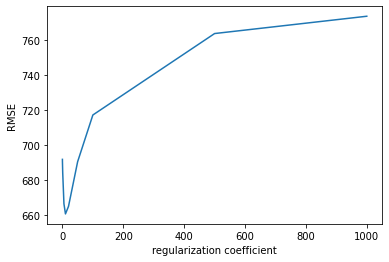

In [52]:
train = pd.read_csv("df1_train.csv")
test_x = pd.read_csv("df1_test1.csv")
test_y = pd.read_csv("df1_test1y.csv")

K = [0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000]

train = pd.read_csv("df1_train.csv")
test_x = pd.read_csv("df1_test1.csv")
test_y = pd.read_csv("df1_test1y.csv")

train_x = train.drop("life_post_consumer",axis=1)
train_y = train["life_post_consumer"]

case = []
for k in K:
    model = Ridge(alpha = k)
    model.fit(train_x, train_y)
    ypred = model.predict(test_x)
    rms = sqrt(mean_squared_error(ypred,test_y))
    case.append(rms)

plt.plot(K,case ,label="Case 3A")
plt.xlabel("regularization coefficient")
plt.ylabel("RMSE")
RMSE = pd.DataFrame({'alpha':K, 'RMSE': case})
print(RMSE)

In [54]:
i = np.argmin(case)
print("best RMSE = ", case[i])
print("best alpha = ", K[i])

model = Ridge(alpha = K[i])
model.fit(train_x, train_y)
ypred = pd.DataFrame(model.predict(test_x), columns = ["prediction"])
# print("RMSE = ", sqrt(mean_squared_error(test_y,ypred)))

best RMSE =  660.5612900111677
best alpha =  10


In [55]:
test_y = pd.concat([test_y, ypred], axis=1)
print("the first 20 data points with best alpha\n", test_y[:20])

the first 20 data points with best alpha
     life_post_consumer   prediction
0                 1183  1068.333624
1                  189   229.755319
2                 2327  2008.558892
3                   76  -102.874899
4                  354   541.457699
5                  713   606.459258
6                  204   414.982798
7                  288   602.810514
8                  555   500.184385
9                  586   492.306636
10                 446   508.376500
11                 884   409.130022
12                 524   730.467680
13                 672   561.060328
14                  23   294.450897
15                 570   602.482867
16                1361  1632.182715
17                5934  2698.882818
18                2319  3841.631528
19                1633  3892.400909


## Q7(case 3B)

Construct a prediction model using the setting of Case 3B. 

**Method：Ridge**

**x_continue：std**

**x_binary：keep**

**y：de-mean**

consider regularization coefficient ( α ):

K = [0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000]

show 
1. plot RMSE
2. find the best test RMSE
2. for the first 20 data points in the testing data using the best α：

    the predictions 

    the true outcome values 


In [0]:
train = pd.read_csv("df1_train.csv")
test_x = pd.read_csv("df1_test1.csv")
test_y = pd.read_csv("df1_test1y.csv")

x_con = ["comp_page_like","life_post_reach","life_post_impression_liked","life_post_reach_liked","comment","like","share"]
train_x = train.drop("life_post_consumer",axis=1)

#y: de-mean
mean = train["life_post_consumer"].mean()
train_y =train["life_post_consumer"]- mean

# remember copy =_=
std_train_x = train_x.copy()
std_test_x = test_x.copy()

std_train_x[x_con] = (train_x[x_con] - train_x[x_con].mean()) / train_x[x_con].std()
std_test_x[x_con] = (test_x[x_con] -train_x[x_con].mean()) / train_x[x_con].std()
# print(std_train_x.mean())

     alpha        RMSE
0     0.01  691.730410
1     0.10  690.304792
2     1.00  681.807570
3     5.00  657.225363
4    10.00  646.328900
5    20.00  645.476510
6    50.00  666.458283
7   100.00  692.026390
8   500.00  752.891749
9  1000.00  785.597577


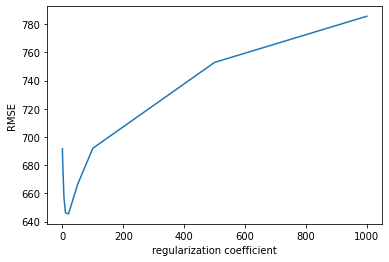

In [58]:
case = []
for k in K:
    model = Ridge(alpha = k)
    model.fit(std_train_x, train_y)
    ypred = model.predict(std_test_x) + mean
    rms = sqrt(mean_squared_error(ypred,test_y))
    case.append(rms)

plt.plot(K,case ,label="Case 3B")
plt.xlabel("regularization coefficient")
plt.ylabel("RMSE")
RMSE = pd.DataFrame({'alpha':K, 'RMSE': case})
print(RMSE)

In [62]:
i = np.argmin(case)
print("best RMSE = ", case[i])
print("best alpha = ", K[i])

model = Ridge(alpha = K[i])
model.fit(std_train_x, train_y)
ypred = pd.DataFrame(model.predict(std_test_x), columns = ["prediction"]) + mean
# print("RMSE = ", sqrt(mean_squared_error(test_y,ypred)))

best RMSE =  645.4765099785809
best alpha =  20


In [63]:
test_y = pd.concat([test_y, ypred], axis=1)
print("the first 20 data points with best alpha\n", test_y[:20])

the first 20 data points with best alpha
     life_post_consumer   prediction
0                 1183  1142.265012
1                  189   254.198319
2                 2327  1833.982491
3                   76    15.819712
4                  354   599.784798
5                  713   635.936238
6                  204   427.811033
7                  288   603.682233
8                  555   514.512946
9                  586   580.018180
10                 446   544.361749
11                 884   477.176056
12                 524   801.529252
13                 672   557.427146
14                  23   396.318924
15                 570   615.195476
16                1361  1474.692004
17                5934  2504.894021
18                2319  3524.448078
19                1633  3437.932512


## Q8(case 3C)

Construct a prediction model using the setting of Case 3C. 

**Method：Ridge**

**x_continue：keep**

**x_binary：keep**

**y：de-mean**

consider regularization coefficient ( α ):

K = [0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000]

show 
1. plot RMSE
2. find the best test RMSE
2. for the first 20 data points in the testing data using the best α：

    the predictions 

    the true outcome values 

     alpha        RMSE
0     0.01  691.756420
1     0.10  690.479473
2     1.00  684.059294
3     5.00  666.374364
4    10.00  660.561290
5    20.00  664.869714
6    50.00  690.419347
7   100.00  717.128279
8   500.00  763.708959
9  1000.00  773.601948


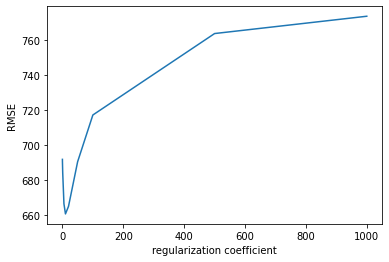

In [64]:
train = pd.read_csv("df1_train.csv")
test_x = pd.read_csv("df1_test1.csv")
test_y = pd.read_csv("df1_test1y.csv")
# y:de-mean
mean = train["life_post_consumer"].mean()
train_y = train["life_post_consumer"]-mean
train_x = train.drop("life_post_consumer",axis=1)
case = []

for k in K:
    model = Ridge(alpha=k)
    model.fit(train_x, train_y)
    ypred = model.predict(test_x) + mean
    rms = sqrt(mean_squared_error(ypred,test_y))
    case.append(rms)

plt.plot(K,case ,label="Case 3C")
plt.xlabel("regularization coefficient")
plt.ylabel("RMSE")
RMSE = pd.DataFrame({'alpha':K, 'RMSE': case})
print(RMSE)

In [67]:
i = np.argmin(case)
print("best RMSE = ", case[i])
print("best alpha = ", K[i])

model = Ridge(alpha = K[i])
model.fit(train_x, train_y)
ypred = pd.DataFrame(model.predict(test_x), columns = ["prediction"])+mean
# print("RMSE = ", sqrt(mean_squared_error(test_y,ypred)))

best RMSE =  660.5612900111676
best alpha =  10


In [68]:
test_y = pd.concat([test_y, ypred], axis=1)
print("the first 20 data points with best alpha\n", test_y[:20])

the first 20 data points with best alpha
     life_post_consumer   prediction
0                 1183  1068.333624
1                  189   229.755319
2                 2327  2008.558892
3                   76  -102.874899
4                  354   541.457699
5                  713   606.459258
6                  204   414.982798
7                  288   602.810514
8                  555   500.184385
9                  586   492.306636
10                 446   508.376500
11                 884   409.130022
12                 524   730.467680
13                 672   561.060328
14                  23   294.450897
15                 570   602.482867
16                1361  1632.182715
17                5934  2698.882818
18                2319  3841.631528
19                1633  3892.400909


## Q9(case 3D)


Construct a prediction model using the setting of Case 3D. 

**Method：Ridge**

**x_continue：std**

**x_binary：std**

**y：de-mean**

consider regularization coefficient ( α ):

K = [0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000]

show 
1. plot RMSE
2. find the best test RMSE
2. for the first 20 data points in the testing data using the best α：

    the predictions 

    the true outcome values 

     alpha        RMSE
0     0.01  692.208566
1     0.10  691.584362
2     1.00  688.603626
3     5.00  678.498716
4    10.00  666.394954
5    20.00  646.565500
6    50.00  610.989753
7   100.00  588.741784
8   500.00  636.516388
9  1000.00  701.718806


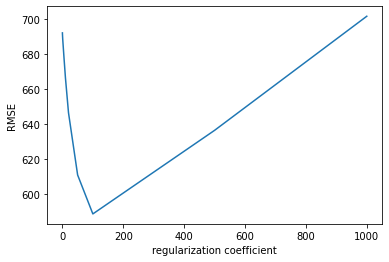

In [69]:
train = pd.read_csv("df1_train.csv")
test_x = pd.read_csv("df1_test1.csv")
test_y = pd.read_csv("df1_test1y.csv")

mean = train["life_post_consumer"].mean()
train_x = train.drop("life_post_consumer",axis=1)
train_y = train["life_post_consumer"]-mean

#apply std both on training and testing data
std_train_x = (train_x - train_x.mean())/train_x.std()
std_test_x = (test_x - train_x.mean())/train_x.std()

case=[]
for k in K:
    model = Ridge(alpha=k)
    model.fit(std_train_x, train_y)
    ypred = model.predict(std_test_x) + mean
    rms = sqrt(mean_squared_error(ypred,test_y))
    case.append(rms)

plt.plot(K,case ,label="Case 3D")
plt.xlabel("regularization coefficient")
plt.ylabel("RMSE")
RMSE = pd.DataFrame({'alpha':K, 'RMSE': case})
print(RMSE)

In [72]:
i = np.argmin(case)
print("best RMSE = ", case[i])
print("best alpha = ", K[i])

model = Ridge(alpha = K[i])
model.fit(std_train_x, train_y)
ypred = pd.DataFrame(model.predict(std_test_x), columns = ["prediction"]) + mean
# print("RMSE = ", sqrt(mean_squared_error(test_y,ypred)))

best RMSE =  588.741783850188
best alpha =  100


In [73]:
test_y = pd.concat([test_y, ypred], axis=1)
print("the first 20 data points with best alpha\n", test_y[:20])

the first 20 data points with best alpha
     life_post_consumer   prediction
0                 1183  1040.627697
1                  189   278.521005
2                 2327  1997.256992
3                   76   -20.789516
4                  354   554.439963
5                  713   602.977544
6                  204   337.641590
7                  288   599.480675
8                  555   470.376753
9                  586   500.989579
10                 446   511.302556
11                 884   387.980076
12                 524   700.273833
13                 672   532.307517
14                  23   255.464612
15                 570   653.439886
16                1361  1727.737607
17                5934  2774.343940
18                2319  3173.478529
19                1633  3140.203123


## Q10(case 4)

Construct a prediction model using the setting of Case 4. 

**Method：Lasso**

**x_continue：std**

**x_binary：keep**

**y：de-mean**

consider regularization coefficient ( α ):

K = [0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000]

show 
1. plot RMSE
2. find the best test RMSE
2. for the first 20 data points in the testing data using the best α：

    the predictions 

    the true outcome values 

In [0]:
train = pd.read_csv("df1_train.csv")
test_x = pd.read_csv("df1_test1.csv")
test_y = pd.read_csv("df1_test1y.csv")

train_x = train.drop("life_post_consumer",axis=1)

#y: de-mean
mean = train["life_post_consumer"].mean()
train_y = train["life_post_consumer"]-mean

#apply std both on training and testing data
std_train_x = train_x.copy()
std_test_x = test_x.copy()

std_train_x[x_con] = (train_x[x_con] - train_x[x_con].mean()) / train_x[x_con].std()
std_test_x[x_con] =(test_x[x_con] -train_x[x_con].mean()) / train_x[x_con].std()

# print(std_train_x.mean())

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47951956.19725828, tolerance: 32249.892375999996
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4448154.969543204, tolerance: 32249.892375999996
  positive)


     alpha        RMSE
0     0.01  692.017929
1     0.10  690.239324
2     1.00  679.485340
3     5.00  654.308759
4    10.00  643.371898
5    20.00  650.123045
6    50.00  687.571844
7   100.00  800.170938
8   500.00  928.809511
9  1000.00  928.809511


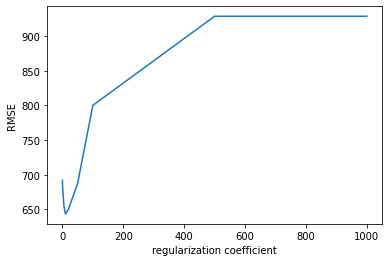

In [77]:
case=[]
for k in K:
    model = linear_model.Lasso(alpha=k)
    model.fit(std_train_x, train_y)
    ypred = model.predict(std_test_x) + mean
    rms = sqrt(mean_squared_error(ypred,test_y))
    case.append(rms)

plt.plot(K,case ,label="Case 4")
plt.xlabel("regularization coefficient")
plt.ylabel("RMSE")
RMSE = pd.DataFrame({'alpha':K, 'RMSE': case})
print(RMSE)

In [81]:
i = np.argmin(case)
print("best RMSE = ", case[i])
print("best alpha = ", K[i])

model = linear_model.Lasso(alpha = K[i])
model.fit(std_train_x, train_y)
ypred = pd.DataFrame(model.predict(std_test_x), columns = ["prediction"])+mean
# print("RMSE = ", sqrt(mean_squared_error(test_y,ypred)))

best RMSE =  643.3718982256364
best alpha =  10


In [82]:
test_y = pd.concat([test_y, ypred], axis=1)
print("the first 20 data points with best alpha\n", test_y[:20])

the first 20 data points with best alpha
     life_post_consumer   prediction
0                 1183  1241.622316
1                  189   287.922231
2                 2327  2119.868436
3                   76   -16.219485
4                  354   449.109272
5                  713   711.128493
6                  204   398.009001
7                  288   460.160572
8                  555   645.423214
9                  586   591.462352
10                 446   429.986328
11                 884   461.478345
12                 524   899.783713
13                 672   571.831893
14                  23   352.895404
15                 570   548.090133
16                1361  1741.039651
17                5934  2712.110796
18                2319  3681.358780
19                1633  3645.022554


## Q11
Summarize the best RMSE of all cases and discuss your findings. How should we preprocess the features?

1. case 3D has the best performance with 
Ridge regression, standardize both continuous-valued and binary, and de-mean with y. when we choose alpha = 100, we can get the smallest RMSE  588.741783850188.

2. form case 2A to 2C, when we use the method OLS (ordinary least squares), different preprocessing procedures with x and y has no effect with the prediction.

3. from case 3A and 3C, when we use Ridge regression, de-mean y or not doesn't effect.

4. from case 3A to 3D , when we use Ridge regression, if we only standardize with continuous-valued feature variables but not binary feature variables, we will get a better performance than non-standardization, also standardize with all feature variables will be the best choice.

5. from case 1 , simply uses the mean of y in the training data to do prediction is the worst of three methods.

6. In this case, when we preprocess the features, standardization of data is necessary to allow each feature value to contribute to the results to a similar degree which means make sure that data is internally consistent and get the better performance


